# Spherical Harmonics



## Contents

- [Linear harmonics](#linear)
- [Harmonics on a sphere](#sphere)
- [Multipole moments and power spectra](#multipole)
- [Spherical harmonics in Python](#python)
- [References](#refs)

<a id='linear'></a>

## Linear harmonics

It is relatively easy to visualize harmonics in 1-D: classically, a vibrating string fixed at both ends; in QM, a particle in an infinite square well.

Mathematically this means solving the wave equation with fixed-endpoint boundary conditions (L is the length):

$$ \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}, \qquad u(0, t) = 0, \quad u(L, t) = 0 $$

For the special case with non-zero initial displacement and zero initial velocity, solutions will take the form

$$ u(x, t) = \sum_{n=1}^{\infty} A_n \cos \frac{c n \pi t}{L} \sin \frac{n \pi x}{L} $$

where $A_n$ are the Fourier coefficients and $n$ is an integer. Our interest here is in the individual terms of the summation, which are the harmonics. The main point is that the wavelength must be quantized such that an integer number of half-wavelengths fit into a distance $L$. Also, the number of nodes (zero crossings other than the endpoints) is always $n-1$.

The visualization below sets $L = c = A_n = 1$ for simplicity. Preferably move the $t$ slider slowly, or the graph will fail to keep up.

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, Layout
import ipywidgets as w

plt.rcParams.update({'font.size': 16})

In [2]:
def plot_wave(n, t):
    x = np.linspace(0, 1, 100)
    y = np.cos(n*np.pi*t) * np.sin(n*np.pi*x)
    plt.figure(figsize=(9, 5))
    plt.plot(x, y)
    plt.ylim(-1.1,1.1)
    plt.xlabel('x/L')
    plt.ylabel('amplitude')
    
    # add some walls and a mid-line
    plt.plot((0,0), (-1.1,1.1), 'k-')
    plt.plot((1,1), (-1.1,1.1), 'k-')
    plt.plot((0,1), (0,0), 'r:')
    

In [3]:
style = {'description_width': 'initial'}
interact(plot_wave, 
             n = w.IntSlider(description="n", style=style,
                                layout=Layout(width='80%'),
                                continuous_update=False, # otherwise flicker is horrible
                                min=1, max=5, 
                                value=2), 
             t = w.FloatSlider(description="time", style=style,
                                continuous_update=True,
                                layout=Layout(width='80%'),
                                min=0, max=2, step=0.02,
                                value=0));


interactive(children=(IntSlider(value=2, continuous_update=False, description='n', layout=Layout(width='80%'),…

<a id='sphere'></a>

## Harmonics on a sphere

Moving to 3-D, inevitably the mathematics gets a bit harder and drawing the results on screen gets much harder. However the broad principles are still the same: periodic boundary conditions force the wavelengths to be quantized.

We are looking for solutions to Laplace's equation, which in spherical coordinates is

\begin{align}
    \nabla^2 f &= \frac{1}{r^2} \frac{\partial}{\partial r}\left(r^2 \frac{\partial f}{\partial r}\right) 
      + \frac{1}{r^2 \sin\theta} \frac{\partial}{\partial \theta}\left(\sin\theta \frac{\partial f}{\partial \theta}\right) 
    + \frac{1}{r^2 \sin^2\theta} \frac{\partial^2 f}{\partial \varphi^2} \\
  &= \frac{1}{r^2} \frac{\partial}{\partial r}\left(r^2 \frac{\partial f}{\partial r}\right) 
  + \frac{1}{r^2} \Lambda^2 f \\
  &= 0
\end{align}

Here $\Lambda^2 = \frac{1}{\sin^2\theta} \frac{\partial^2}{\partial \varphi^2} + \frac{1}{\sin\theta} \frac{\partial}{\partial \theta}\left(\sin\theta \frac{\partial}{\partial \theta}\right) $ is the __Legendrian__, the angular part of the Laplacian.

As scientists rather than mathematicians, we are interested in a class of solutions where $f(r,\theta,\phi) = R(r) Y(\theta,\phi)$ and $Y(\theta,\phi) = \Theta(\theta) \Phi(\phi)$. It can be shown (by other people, not me) that 

$$ Y_l^m (\theta,\phi) = N e^{i m \phi} P_l^m (\cos \theta) $$

where $P_l^m (\cos \theta)$ is the associated Legendre function (see the Legendre notebook in this folder). The normalization constant is 

$$ N = \sqrt{\frac{2(l+1)}{4 \pi} \frac{(l-m)!}{(l+m)!}} $$

We get useful (normalizable) solutions when $l$ is a non-negative integer and $m = -l, \dots, +l$.

Clearly $Y_l^m (\theta,\phi)$ is complex-valued, but drawing the absolute value and doing sophisticated shading gives the image below.

Anyone with a chemistry background (like me) will look and this from the top down and immediately think "s, p, d, f" rather than $l = 0, 1, 2, 3$. These are the orbital symmetries which can be derived exactly for the hydrogen atom and approximately for atoms with more than one electron. 

Note that for each value of $l$ there are $2l+1$ values of $m$. Also, there are always $l$ nodal planes (the blue and yellow lobes have opposite sign for the real part of $Y_l^m$).

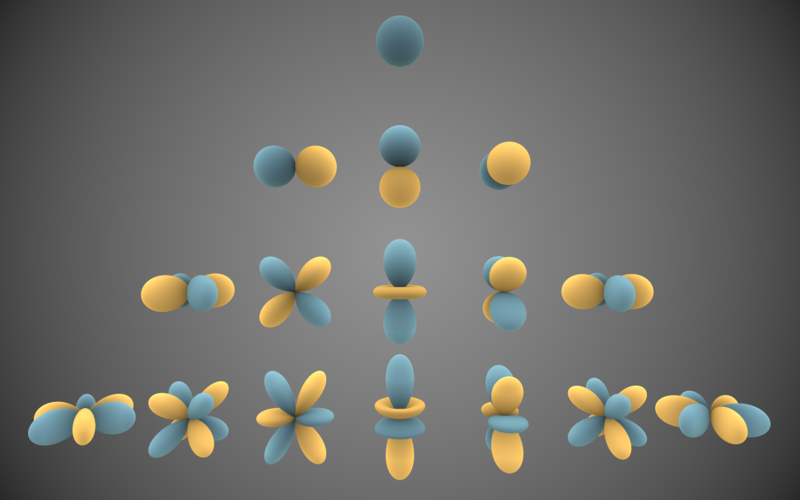

Image: Inigo.quilez, https://commons.wikimedia.org/wiki/File:Spherical_Harmonics.png. This file is licensed under the [Creative Commons Attribution-Share Alike 3.0 Unported license](https://creativecommons.org/licenses/by-sa/3.0/deed.en)            

<a id='multipole'></a>

## Multipole moments and power spectra

If a function depends on the two angles on a sphere, it can generally be expanded as a series of spherical harmonics, in the same way that a 1-D function can be expanded as a Fourier series. This principle can be extended to discrete data, analogous to the discrete Fourier transform.

In astrophysics, the classic example of this is the Cosmic Microwave Background (CMB) anisotropy data collected at increasing resolution by the COBE, WMAP and Planck satellites. This is WMAP data (supplied by NASA, public domain):

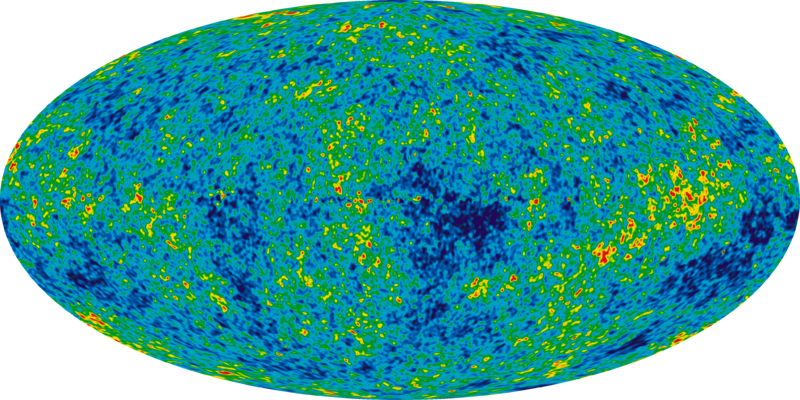

Converting this to a power spectrum was by all acounts highly non-trivial, but this is the published result (also public domain):

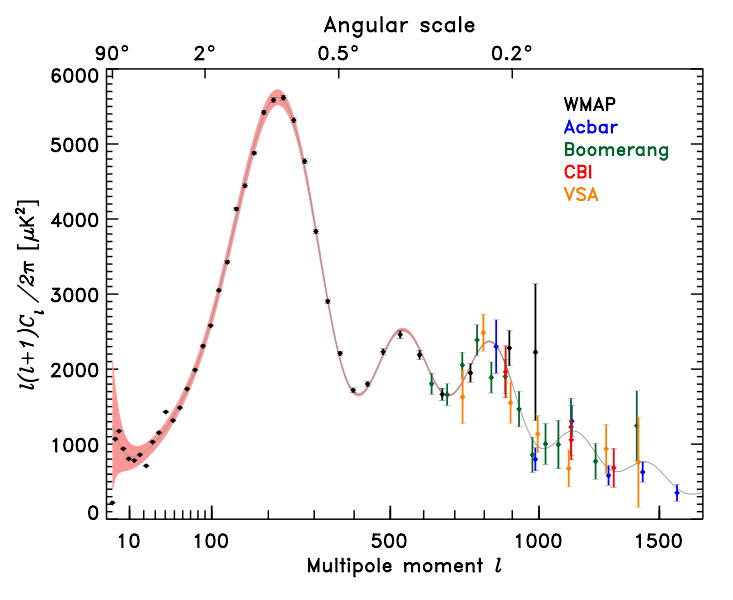

The main peak is close to $l = 180$, meaning the strongest features are at about $1^{\circ}$ intervals across the sky. The vertical axis is essentially the coefficient $C_l^m$ of each mode in the multipole expansion:

$$ f(\theta, \phi) = \sum_{l=0}^{\infty} \sum_{m = -l}^l C_l^m Y_l^m (\theta, \phi) $$

<a id='python'></a>

## Spherical harmonics in Python

Getting into OpenGL shading is well beyond the scope of this notebook, but there are simpler things we can do. 

The function `sympy.special.Ynm()` lets us work with symbolic math. The next cell only shows non-negative values of $m$, but always $Y_n^{-m} = -(Y_n^m)^*$, the negative complex conjugate.

The subscript is here $n$ rather than $l$; conventions vary, but nothing is really different.

In [4]:
from IPython.display import Math
from sympy import Ynm, Symbol, simplify, latex, init_printing
init_printing()
from sympy.abc import n,m
theta = Symbol("theta")
phi = Symbol("phi")
for n in range(3):
    for m in range(0, n+1):
        Y_nm = latex(simplify(Ynm(n, m, theta, phi).expand(func=True)))
        display(Math('Y_{}^{} = {}'.format(n, m, Y_nm)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

For numerical work we can use `scipy.special.sph_harm()`. I lifted this example code from the [SciPython book](https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/). It plots the real part of $Y_l^m$ on the unit sphere.

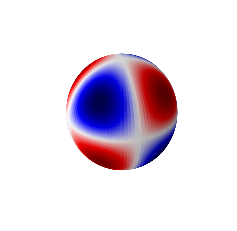

In [5]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

<a id='refs'></a>

## References

